### Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.

In [154]:
import numpy as np
import matplotlib.pyplot as plt

In [155]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

In [156]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Нормализация [0, 1]

In [157]:
X[1].min(), X[1].max()

(0, 10)

In [158]:
X[2].min(), X[2].max()

(450, 2000)

In [159]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [160]:
X_norm[1] = (X[1] - X[1].min()) / (X[1].max() - X[1].min())
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e-01, 1.00e-01, 2.00e-01, 5.00e-01, 3.00e-01, 0.00e+00,
        5.00e-01, 1.00e+00, 1.00e-01, 2.00e-01],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [161]:
X_norm[2] = (X[2] - X[2].min()) / (X[2].max() - X[2].min())
X_norm

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.1       , 0.1       , 0.2       , 0.5       , 0.3       ,
        0.        , 0.5       , 1.        , 0.1       , 0.2       ],
       [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
        0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
       [1.        , 1.        , 2.        , 1.        , 2.        ,
        1.        , 3.        , 3.        , 1.        , 2.        ]])

Стандартизация

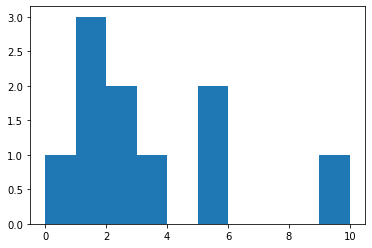

In [162]:
plt.hist(X[1])
plt.show()

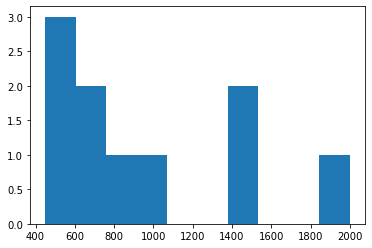

In [163]:
plt.hist(X[2])
plt.show()

In [164]:
X_st = X.copy().astype(np.float64)
X1_mean = X[1].mean()
X1_std = X[1].std()
print(X1_mean, X1_std)

3.0 2.8284271247461903


In [165]:
X_st[1] = (X[1] - X1_mean) / X1_std
X_st

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00],
       [-7.07106781e-01, -7.07106781e-01, -3.53553391e-01,
         7.07106781e-01,  0.00000000e+00, -1.06066017e+00,
         7.07106781e-01,  2.47487373e+00, -7.07106781e-01,
        -3.53553391e-01],
       [ 5.00000000e+02,  7.00000000e+02,  7.50000000e+02,
         6.00000000e+02,  1.45000000e+03,  8.00000000e+02,
         1.50000000e+03,  2.00000000e+03,  4.50000000e+02,
         1.00000000e+03],
       [ 1.00000000e+00,  1.00000000e+00,  2.00000000e+00,
         1.00000000e+00,  2.00000000e+00,  1.00000000e+00,
         3.00000000e+00,  3.00000000e+00,  1.00000000e+00,
         2.00000000e+00]])

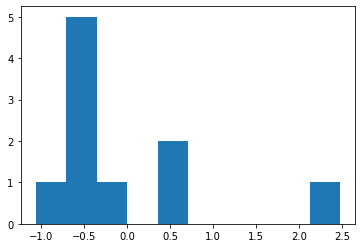

In [166]:
plt.hist(X_st[1])
plt.show()

In [167]:
def calc_std_fit(x):
    res = (x - x.mean()) / x.std()
    return res

In [168]:
X_st[2] = calc_std_fit(X[2])

In [169]:
X_st[3] = calc_std_fit(X[3])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.70710678, -0.70710678, -0.35355339,  0.70710678,  0.        ,
        -1.06066017,  0.70710678,  2.47487373, -0.70710678, -0.35355339],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

SGD (Stochastic gradient descent)

In [170]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [171]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [172]:
eval_model(X_st, y, iterations=1000, alpha=1e-2)

100 [48.97594178  4.21396206  3.8500301   4.21180116] 87.17023192527043
200 [55.50216274  4.95035208  2.97995267  4.44787223] 27.880057713679292
300 [56.36766727  5.3867876   2.3048158   4.72276707] 26.13015899953521
400 [56.48245009  5.65898045  1.78063628  4.99953148] 25.682538436839167
500 [56.49767254  5.83477719  1.36781865  5.25424451] 25.41382962551478
600 [56.49969133  5.95264982  1.03929184  5.47793845] 25.24069820623705
700 [56.49995906  6.03470225  0.77589591  5.66914875] 25.127246339675793
800 [56.49999457  6.0938447   0.56361685  5.82990753] 25.052342123121413
900 [56.49999928  6.13778238  0.39191637  5.96365141] 25.00271593716273
1000 [56.4999999   6.17124081  0.25269258  6.07416416] 24.96978439147539


array([56.4999999 ,  6.17124081,  0.25269258,  6.07416416])

In [173]:
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    
    if n % qty_in_batch != 0:
        n_batch += 1
        
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
#             print(b, n_batch, start_, end_)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]

            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)

            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
        
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [174]:
eval_sgd_model(X_st, y, iterations=5000, qty_in_batch=4, alpha=1e-2)

500 [56.50784698  5.97750364  1.08351832  5.42226764] 13.22221406152914
1000 [56.51047211  6.20384913  0.15264278  6.15907458] 11.976428520754597
1500 [56.51056661  6.2741569  -0.1787118   6.43115941] 11.534849007099325
2000 [56.510601    6.2988798  -0.29773276  6.52939838] 11.377292576022395
2500 [56.51061339  6.3077444  -0.34053991  6.5647571 ] 11.320841272741252
3000 [56.51061784  6.31093184 -0.35593881  6.57747792] 11.300566039370075
3500 [56.51061945  6.31207841 -0.36147835  6.58205413] 11.29327661603256
4000 [56.51062003  6.31249087 -0.36347113  6.58370037] 11.290654903555712
4500 [56.51062023  6.31263925 -0.36418801  6.58429259] 11.289711847999241
5000 [56.51062031  6.31269263 -0.3644459   6.58450563] 11.28937260463764


array([56.51062031,  6.31269263, -0.3644459 ,  6.58450563])

L1 регуляризация

L2 регуляризация

In [188]:
def eval_model_reg2(X, y, iterations, lambda_, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [176]:
eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-2)

500 [56.21673324  5.8620134   1.0973114   5.48152978] 25.34927695273098
1000 [56.21890539  6.13817008  0.25676075  6.07808629] 25.050567809213156
1500 [ 5.62189055e+01  6.20065670e+00 -2.09333286e-02  6.30256226e+00] 25.004260655449052
2000 [56.21890547  6.2204893  -0.11551226  6.3803969 ] 24.99463592254599
2500 [56.21890547  6.22720312 -0.14786762  6.4070916 ] 24.99206795677695
3000 [56.21890547  6.22949791 -0.15894336  6.4162329 ] 24.991273908939345
3500 [56.21890547  6.23028335 -0.16273509  6.41936254] 24.99101203395977
4000 [56.21890547  6.23055224 -0.16403319  6.42043399] 24.990923548804716
4500 [56.21890547  6.23064429 -0.1644776   6.4208008 ] 24.990893392698055
5000 [56.21890547  6.23067581 -0.16462974  6.42092637] 24.990883084763983


array([56.21890547,  6.23067581, -0.16462974,  6.42092637])

In [178]:
eval_model(X_st, y, iterations=5000, alpha=1e-2)

500 [56.49767254  5.83477719  1.36781865  5.25424451] 25.41382962551478
1000 [56.4999999   6.17124081  0.25269258  6.07416416] 24.96978439147539
1500 [56.5         6.2575128  -0.13774522  6.39128671] 24.913059475565504
2000 [56.5         6.28678323 -0.27772011  6.50655795] 24.905712417850072
2500 [56.5         6.29722767 -0.32807425  6.54810646] 24.9047605537917
3000 [56.5         6.30098239 -0.34619733  6.56306445] 24.904637232271703
3500 [56.5         6.30233363 -0.3527205   6.5684486 ] 24.904621254991206
4000 [56.5         6.30281999 -0.35506846  6.57038658] 24.904619185007856
4500 [56.5         6.30299505 -0.35591359  6.57108415] 24.904618916825118
5000 [56.5         6.30305806 -0.35621778  6.57133523] 24.90461888207991


array([56.5       ,  6.30305806, -0.35621778,  6.57133523])

## Д/з

* Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

* Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

* Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

**1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока)**

In [203]:
def eval_model_reg_graph(X, y, iterations, lambda_, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
        #if i % (iterations / 10) == 0:
            #print(i, W, err)
    return W1_list.append(W[0]), W2_list.append(W[1]), W3_list.append(W[2]), W4_list.append(W[3]), lambda_list.append(lambda_)

In [204]:
l = 1e-2
W1_list = []
W2_list = []
W3_list = []
W4_list = []
lambda_list = []

for i in range (330):
    eval_model_reg_graph(X_st, y, iterations=5000, alpha=1e-2, lambda_=l)
    l *= 1.03

W1_list = np.array(W1_list)
W2_list = np.array(W2_list)
W3_list = np.array(W3_list)
W4_list = np.array(W4_list)
lambda_list = np.array(lambda_list)

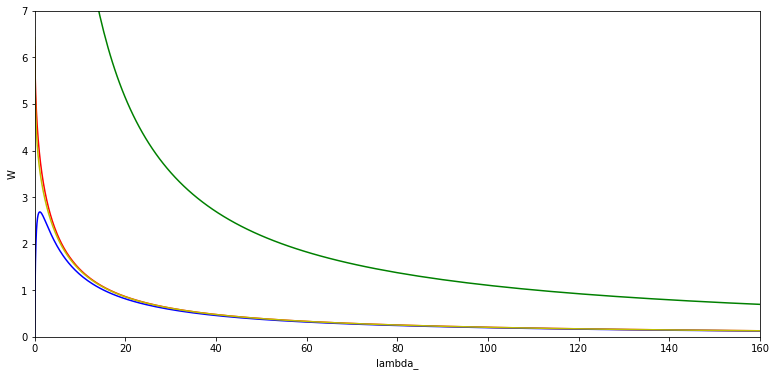

In [205]:
plt.figure(figsize=(13, 6))

plt.xlabel('lambda_')
plt.ylabel('W')
plt.ylim(0, 7)
plt.xlim(0,160)

plt.plot(lambda_list, W1_list, color='g')
plt.plot(lambda_list, W2_list, color='r')
plt.plot(lambda_list, W3_list, color='b')
plt.plot(lambda_list, W4_list, color='y')

**2. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.**

In [206]:
def eval_model_reg1(X, y, iterations, lambda_, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W)) 
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [207]:
eval_model_reg1(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-2)

500 [56.49270273  5.89731602  1.03874564  5.52549993] 25.237645643953016
1000 [56.49499991  6.19297997  0.13340257  6.16973678] 24.9470581128138
1500 [56.495       6.25283621 -0.14920634  6.40567697] 24.912128602614203
2000 [56.495       6.27187482 -0.24364934  6.48412909] 24.906843609688625
2500 [56.495       6.27890074 -0.27769769  6.51225793] 24.905714642940573
3000 [56.495       6.28143852 -0.28995589  6.52237707] 24.905408556961355
3500 [56.495       6.28235242 -0.29436827  6.52601908] 24.905311380206506
4000 [56.495       6.2826814  -0.29595647  6.52732998] 24.905278086272634
4500 [56.495       6.28279981 -0.29652813  6.52780183] 24.90526632059261
5000 [56.495       6.28284243 -0.2967339   6.52797166] 24.905262113904314


array([56.495     ,  6.28284243, -0.2967339 ,  6.52797166])

**3. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?**

Технически возможно, такое преобразование но практически не несет в себе смысла